In [3]:
import numpy as np
import IPython

Fancy Indexing

In [17]:
x = np.random.randint(20, size = (3,5))
x


array([[ 1,  6, 10,  0,  7],
       [13, 14,  6,  8, 10],
       [19, 19, 12,  4, 12]])

In [35]:
ind_row = [0,1,2,1,0]
ind_col = [0,1,2,3,4]

In [36]:
x[ind_row, ind_col]

array([ 1, 14, 12,  8,  7])

Random selection of points with indexing

In [38]:
mean = [0,0]
cov = [[1,2], [2,5]]
x = np.random.multivariate_normal(mean, cov, 100)
x.shape

(100, 2)

In [8]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

Create the plot

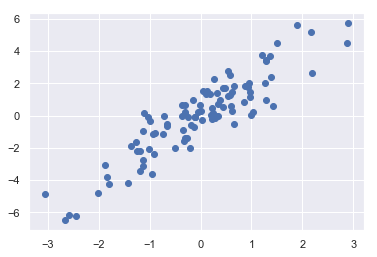

In [47]:
plt.scatter(x[:, 0], x[:, 1]);

Now to select 20 random points using fancy indexing

In [52]:
ran = np.random.choice(x.shape[0], 20, replace = False)

In [70]:
ran

array([66, 25, 50, 87, 88, 32,  3, 18, 21,  7, 65, 12, 45, 67, 49,  5, 11,
       82, 35, 77])

In [68]:
selection = x[ran]

In [69]:
selection

array([[ 1.91919370e-01,  1.32130729e+00],
       [-2.01786993e+00, -4.83496692e+00],
       [-2.44927688e+00, -6.21747990e+00],
       [ 8.78820917e-01,  1.84985050e+00],
       [ 2.90420400e+00,  5.74346211e+00],
       [-2.64706108e-01, -1.40446664e+00],
       [ 2.97681388e-03,  2.80988747e-01],
       [ 1.88430868e+00,  5.62038200e+00],
       [ 1.27049823e+00,  2.04422445e+00],
       [-2.53636528e-01, -9.70339011e-02],
       [-3.28954603e-01, -1.55921641e+00],
       [ 3.55898401e-02, -2.78402700e-01],
       [-7.38590748e-01, -1.16056674e+00],
       [-1.83749440e+00, -3.82158762e+00],
       [-1.18642732e+00, -2.17508689e+00],
       [-1.12219658e+00, -3.12665988e+00],
       [ 9.85650983e-01,  1.05250049e-02],
       [-1.88235993e+00, -3.08743227e+00],
       [ 1.08631958e-01,  1.35757904e+00],
       [ 3.03354128e-01, -8.36825992e-03]])

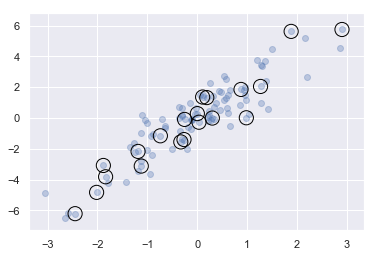

In [76]:
plt.scatter(x[:, 0], x[:, 1], alpha=0.3) 
plt.scatter(selection[:, 0], selection[:, 1],facecolor='none', edgecolor='black', s=200)

In [95]:
y = np.array([1,5,3,2,4])
y = np.sort(y)
y

array([1, 2, 3, 4, 5])

In [97]:
z = np.array([1,5,3,2,4])
z.sort()
z

array([1, 2, 3, 4, 5])

## KNN Example (K Nearest Neighbor)

Create data, 10 random points (random 10 by 2 array)

In [16]:
x = np.random.rand(10,2)
x

array([[0.76185153, 0.93855143],
       [0.61372184, 0.5725171 ],
       [0.34490053, 0.8547376 ],
       [0.25095323, 0.21522744],
       [0.55424945, 0.86746168],
       [0.75285807, 0.67864992],
       [0.4957448 , 0.7804571 ],
       [0.55227203, 0.08847272],
       [0.96243438, 0.44653953],
       [0.94725542, 0.10149604]])

Import plotting libraries

In [15]:
import matplotlib.pyplot as plt
import seaborn; 
seaborn.set() 

Visualize generated points

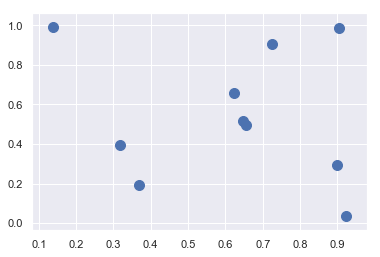

In [12]:
plt.scatter(x[:, 0], x[:, 1], s= 100)

Calculate distance between all points

In [54]:
#distance = sqrt((x1-x2)^2 + (y1-y2)^2)

differences = x[:, np.newaxis] - x[np.newaxis, :]
differences

array([[[ 0.        ,  0.        ],
        [ 0.14812969,  0.36603433],
        [ 0.416951  ,  0.08381383],
        [ 0.5108983 ,  0.72332399],
        [ 0.20760208,  0.07108975],
        [ 0.00899346,  0.25990151],
        [ 0.26610673,  0.15809432],
        [ 0.2095795 ,  0.85007871],
        [-0.20058285,  0.49201189],
        [-0.18540389,  0.83705539]],

       [[-0.14812969, -0.36603433],
        [ 0.        ,  0.        ],
        [ 0.26882131, -0.28222049],
        [ 0.36276862,  0.35728967],
        [ 0.05947239, -0.29494458],
        [-0.13913623, -0.10613282],
        [ 0.11797704, -0.20794   ],
        [ 0.06144981,  0.48404438],
        [-0.34871253,  0.12597757],
        [-0.33353358,  0.47102106]],

       [[-0.416951  , -0.08381383],
        [-0.26882131,  0.28222049],
        [ 0.        ,  0.        ],
        [ 0.09394731,  0.63951016],
        [-0.20934892, -0.01272408],
        [-0.40795753,  0.17608767],
        [-0.15084427,  0.07428049],
        [-0.20737149,  0

In [55]:
# square these differences
diff_sq = differences ** 2

In [59]:
# sum the coord distance
sum_diff_sq = diff_sq.sum(-1)
sum_diff_sq

array([[0.        , 0.15592353, 0.18087289, 0.78421468, 0.04815238,
        0.06762967, 0.0958066 , 0.76655738, 0.28230918, 0.73503633],
       [0.15592353, 0.        , 0.1519133 , 0.25925697, 0.09052927,
        0.03062307, 0.05715763, 0.23807505, 0.13747078, 0.33310549],
       [0.18087289, 0.1519133 , 0.        , 0.41779934, 0.04398887,
        0.19743622, 0.02827158, 0.6301648 , 0.5479737 , 0.93020425],
       [0.78421468, 0.25925697, 0.41779934, 0.        , 0.51739811,
        0.46666887, 0.3794075 , 0.10685978, 0.55971072, 0.49777158],
       [0.04815238, 0.09052927, 0.04398887, 0.51739811, 0.        ,
        0.07509526, 0.01099259, 0.60682771, 0.34379038, 0.74115705],
       [0.06762967, 0.03062307, 0.19743622, 0.46666887, 0.07509526,
        0.        , 0.07647193, 0.3885439 , 0.09779746, 0.37089694],
       [0.0958066 , 0.05715763, 0.02827158, 0.3794075 , 0.01099259,
        0.07647193, 0.        , 0.48203772, 0.3293001 , 0.66484997],
       [0.76655738, 0.23807505, 0.6301648

In [68]:
nearest = np.argsort(sum_diff_sq, axis=1)
nearest

array([[0, 4, 5, 6, 1, 2, 8, 9, 7, 3],
       [1, 5, 6, 4, 8, 2, 0, 7, 3, 9],
       [2, 6, 4, 1, 0, 5, 3, 8, 7, 9],
       [3, 7, 1, 6, 2, 5, 9, 4, 8, 0],
       [4, 6, 2, 0, 5, 1, 8, 3, 7, 9],
       [5, 1, 0, 4, 6, 8, 2, 9, 7, 3],
       [6, 4, 2, 1, 5, 0, 8, 3, 7, 9],
       [7, 3, 9, 1, 8, 5, 6, 4, 2, 0],
       [8, 5, 9, 1, 0, 7, 6, 4, 2, 3],
       [9, 8, 7, 1, 5, 3, 6, 0, 4, 2]])

Set nearest partition amount

In [92]:
k = 5
nearest_partition = np.argpartition(sum_diff_sq, k + 1, axis=1)
nearest_partition

array([[0, 4, 6, 5, 1, 2, 8, 9, 7, 3],
       [6, 4, 2, 8, 1, 5, 0, 7, 3, 9],
       [1, 4, 2, 6, 0, 5, 3, 8, 7, 9],
       [3, 7, 1, 6, 2, 5, 9, 4, 8, 0],
       [6, 4, 2, 0, 5, 1, 8, 3, 7, 9],
       [1, 0, 5, 4, 6, 8, 2, 9, 7, 3],
       [5, 4, 2, 6, 1, 0, 8, 3, 7, 9],
       [7, 3, 9, 1, 8, 5, 6, 4, 2, 0],
       [1, 9, 8, 5, 0, 7, 6, 4, 2, 3],
       [5, 7, 8, 9, 1, 3, 6, 0, 2, 4]])

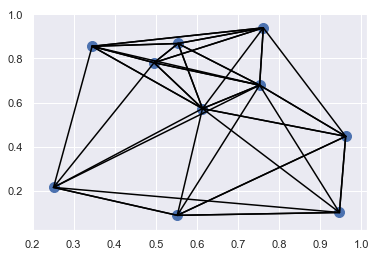

In [93]:
 plt.scatter(x[:, 0], x[:, 1], s=100)

for i in range(x.shape[0]):
    for j in nearest_partition[i, :k+1]:
        plt.plot(*zip(x[j], x[i]), color='black')